In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# 1. Generate synthetic data
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=0
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [3]:
# 2. Bagging with decision trees
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=None, random_state=0),
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=0,
    n_jobs=-1
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print("Bagging Accuracy:", acc_bag)

Bagging Accuracy: 0.94


In [4]:
# 3. Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=0,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.9533333333333334


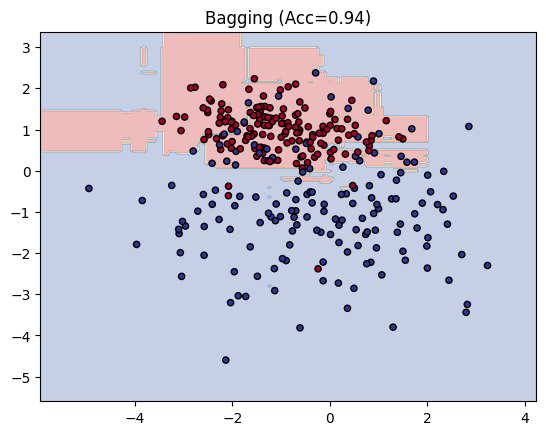

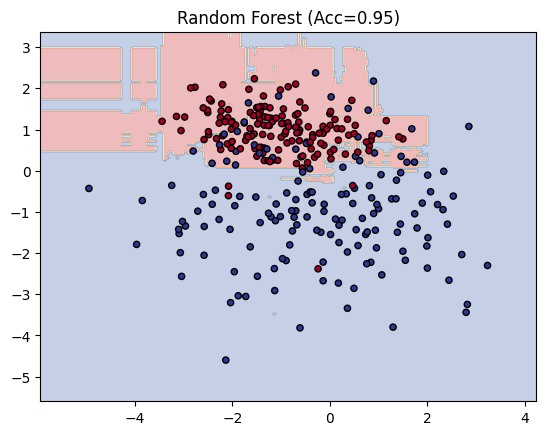

In [6]:
# 4. Optional: Decision boundary plot (using only 2 features for visualization)
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=20)
    plt.title(title)
    plt.show()

# For visualization, train models only on first 2 features
X_vis = X_train[:, :2]
X_vis_test = X_test[:, :2]

bagging_vis = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=None, random_state=0),
    n_estimators=100, random_state=0
).fit(X_vis, y_train)

rf_vis = RandomForestClassifier(
    n_estimators=100, random_state=0
).fit(X_vis, y_train)

plot_decision_boundary(bagging_vis, X_vis_test, y_test, f"Bagging (Acc={acc_bag:.2f})")
plot_decision_boundary(rf_vis, X_vis_test, y_test, f"Random Forest (Acc={acc_rf:.2f})")